In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [4]:
df=pd.read_csv('loan_prediction.csv')

In [5]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
df.isna().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

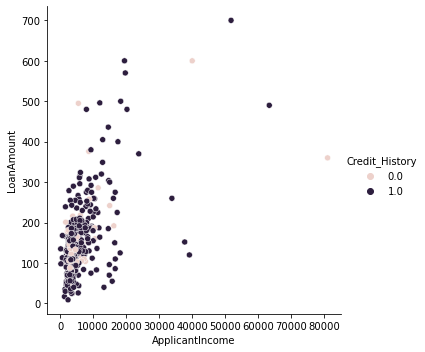

In [9]:
sns.relplot(x='ApplicantIncome',y='LoanAmount',hue="Credit_History",data=df)


<AxesSubplot:>

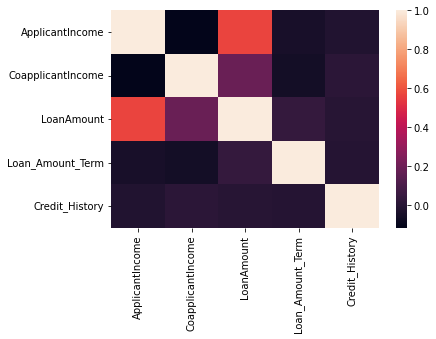

In [30]:
sns.heatmap(df.corr())


In [11]:
df.Gender.fillna('0', inplace=True)
df.Married.fillna('0', inplace=True)
df.Self_Employed.fillna('0', inplace=True)
df.LoanAmount.fillna(df.LoanAmount.mean(), inplace=True)
df.Loan_Amount_Term.fillna(360.0, inplace=True)
df.Credit_History.fillna(1.0, inplace=True)
df.Dependents.fillna(df.Dependents.mode()[0], inplace=True)

df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
print(df.Dependents.value_counts())
print(df.Dependents.isna().sum())

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64
0


In [23]:
to_num = {'Male': 1, 'Female': 2,
'Yes': 1, 'No': 2,
'Graduate': 1, 'Not Graduate': 2,
'Urban': 3, 'Semiurban': 2,'Rural': 1,
'Y': 1, 'N': 0,
'3+': 3}

In [53]:
len(x)

614

In [54]:
len(y)

614

In [55]:
numeric = df.select_dtypes('number').columns.to_list()
categ= df.select_dtypes('object').columns.to_list()
loannum=df[numeric]
loncateg=df[categ]

In [56]:
print(df[categ[-1]].value_counts())


Y    422
N    192
Name: Loan_Status, dtype: int64


In [57]:
x=pd.get_dummies(df.iloc[:,1:12])

y=df['Loan_Status']

y.describe()

count     614
unique      2
top         Y
freq      422
Name: Loan_Status, dtype: object

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [59]:
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)

y_predict = DT.predict(x_test)

print(classification_report(y_test, y_predict))

# Accuracy score
DT_SC = accuracy_score(y_predict,y_test)
DT_SC 

              precision    recall  f1-score   support

           N       0.55      0.55      0.55        51
           Y       0.83      0.83      0.83       134

    accuracy                           0.75       185
   macro avg       0.69      0.69      0.69       185
weighted avg       0.75      0.75      0.75       185



0.7513513513513513

In [60]:
RF = RandomForestClassifier()
RF.fit(x_train, y_train)

y_predict = RF.predict(x_test)

print(classification_report(y_test, y_predict))

# Accuracy score
RF_SC = accuracy_score(y_predict,y_test)
RF_SC 

              precision    recall  f1-score   support

           N       0.69      0.39      0.50        51
           Y       0.80      0.93      0.86       134

    accuracy                           0.78       185
   macro avg       0.75      0.66      0.68       185
weighted avg       0.77      0.78      0.76       185



0.7837837837837838

In [61]:
LR = LogisticRegression()
LR.fit(x_train, y_train)

y_predict = LR.predict(x_test)

print(classification_report(y_test, y_predict))

# Accuracy score
LR_SC = accuracy_score(y_predict,y_test)
LR_SC

              precision    recall  f1-score   support

           N       0.92      0.43      0.59        51
           Y       0.82      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.87      0.71      0.74       185
weighted avg       0.85      0.83      0.81       185



C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8324324324324325

In [62]:
score = [DT_SC,RF_SC,LR_SC]
Models = pd.DataFrame({
    'neighbors': ["Decision Tree","Random Forest", "Logistic Regression"],
    'Score': score})
Models.sort_values(by='Score', ascending=False)

,neighbors,Score
2,Logistic Regression,0.832432
1,Random Forest,0.783784
0,Decision Tree,0.751351
